In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

In [ ]:
networks = ['deepvo', 'deepvo_se3', 'deepvo_quat', 'deepvo_quat_geodesic']
train_or_val = ['train', 'validation']
losses = ['loss','rotation_loss','translation_loss']
experiment_name = 'icra23'

for i,network in enumerate(networks):
    for j,set in enumerate(train_or_val):
        for k,loss in enumerate(losses):
            if "se3" in network or "quat" in network:
                file = os.path.join(os.getcwd(),'../saved/logs', network, experiment_name,
                                set + '_'+ 'epoch' + '_' + loss + '.csv')
            else:
                file = os.path.join(os.getcwd(),'../saved/logs', network, experiment_name, 
                                    set + '_'+ 'epoch' + '_' + loss + '.csv')
            df = pd.read_csv(file) # each file has 3 columns: Step, Wall time, Value
            df = df.drop(columns=['Wall time','Step'])
            df = df.rename(columns={'Value': network+ '_' + set + '_' + loss})
            if i==0 and j==0 and k==0:
                df_all = df
            else:
                df_all = pd.merge(df_all, df, left_index=True, right_index=True) # merge on index


In [165]:
# from matplotlib import font_manager as fm, rcParams
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
from matplotlib import rcParams
def plot_loss(df_all, networks, train_or_val, losses,index = 0,title=None,ylim = [0,1], xlim = [0,200], figsize = (15,8), legend_loc = 'upper right',ncols=1,bbox=None, fontsize = 25, loss_label = 'Loss', legend = True):
    colors = sns.color_palette("Paired", len(networks)*2+len(losses)+len(train_or_val)*2)
    sns.set_style("ticks")
    sns.set_palette("pastel")
    # specify the custom font to us
    plt.rcParams['font.family'] = 'Latin Modern Roman'
    plt.rcParams['font.sans-serif'] = 'Latin Modern Roman'
    # set text size
    plt.rcParams['font.size'] = fontsize

    fig, ax = plt.subplots(figsize=figsize)
    y_pos = df_all.index.values

    for n,network in enumerate(networks):
        for s,set in enumerate(train_or_val):
            for l,loss in enumerate(losses):
                # Smoothing
                smooth_array = gaussian_filter1d(df_all[network+ '_' + set + '_' + loss], sigma=2)
                # Error formating
                upper_err = gaussian_filter1d(df_all[network+ '_' + set + '_' + loss]+df_all[network+ '_' + set + '_' + loss].rolling(window=5, min_periods=0).std().fillna(0), sigma=5)
                lower_err = gaussian_filter1d(df_all[network+ '_' + set + '_' + loss]-df_all[network+ '_' + set + '_' + loss].rolling(window=5, min_periods=0).std().fillna(0) , sigma=5)

                # ax.plot(y_pos, df_all[network+ '_' + set + '_' + loss], '--', linewidth=0.7, alpha=0.45)
                label = ""
                if "se3"  in network: label+= " (SE3)"
                elif "quat" in network: label+= " (quaternion)"
                else: label+=" (original)"
                ax.plot(y_pos, smooth_array, label=label+ ' ' + set , color = colors[s+2*(n)+index])
                ax.fill_between(y_pos, upper_err, lower_err, alpha=0.2,color = colors[s+2*(n)+index])
                # sns.lineplot(data=df_all, x=y_pos, y=network+ '_' + set + '_' + loss, hue=set)
    if legend:
        plt.legend(loc=legend_loc, ncol =ncols,bbox_to_anchor=bbox, labelspacing = .1, columnspacing = .4, handlelength = .5, handletextpad = .1, borderaxespad = .1)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    ax.set_xlabel('Epoch')
    ax.set_ylabel(loss_label)
    plt.ticklabel_format(scilimits=(-1, 10))
    sns.despine(offset=5, trim=True);
    # Create directory for file if it does not exist
    if not os.path.exists(os.path.join(os.getcwd(),"..","media",experiment_name)):
        os.makedirs(os.path.join(os.getcwd(),"..","media",experiment_name))
    if title is not None:plt.savefig(os.path.join(os.getcwd(),"..","media",experiment_name,title+'.pdf'), bbox_inches = 'tight') 
    plt.show()


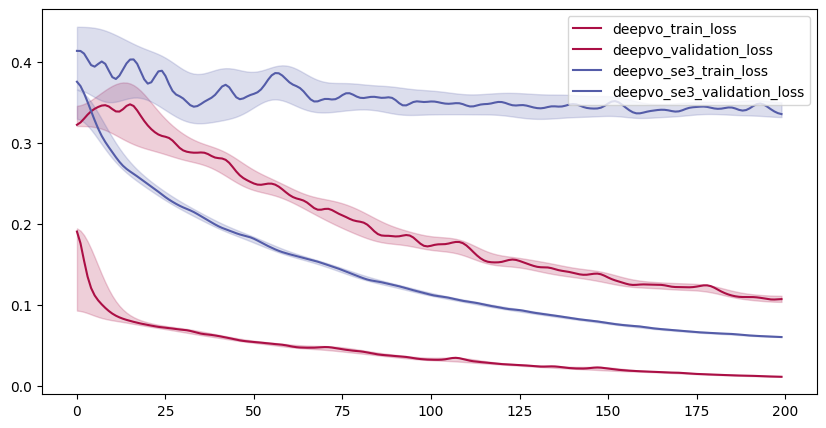

In [166]:
networks = ['deepvo','deepvo_se3','deepvo_quat', 'deepvo_quat_geodesic']
train_or_val = ['validation','train'] # loc="center left", ncol =1,bbox_to_anchor=(1, .3)
losses = ['loss']
plot_loss(df_all, networks, train_or_val, losses,ylim=[0,.5], figsize = (16,8),title = "Total_loss", legend_loc='upper right',ncols=3) #, title = "Total_loss"
# networks = ['deepvo_se3']
# losses = ['loss']
# plot_loss(df_all, networks, train_or_val, losses, index = 2) #, title = "Total_loss"
# networks = ['deepvo_quat']
# losses = ['loss']
# plot_loss(df_all, networks, train_or_val, losses, index = 4) #, title = "Total_loss"
networks = ['deepvo','deepvo_se3','deepvo_quat', 'deepvo_quat_geodesic']
train_or_val = ['validation','train'] # loc="center left", ncol =1,bbox_to_anchor=(1, .3)
losses = ['rotation_loss']
plot_loss(df_all, networks, train_or_val, losses, figsize = (16,8), ylim=[0,0.0075], loss_label='Rotation loss', title = 'Total_rotation',ncols=3,fontsize = 50, legend = False) #, title = "Total_loss"
losses = ['translation_loss']
plot_loss(df_all, networks, train_or_val, losses, figsize = (16,8), loss_label='Translation loss', ylim=[0,0.4], title = 'Total_translation',ncols=3,fontsize = 50, legend = False)

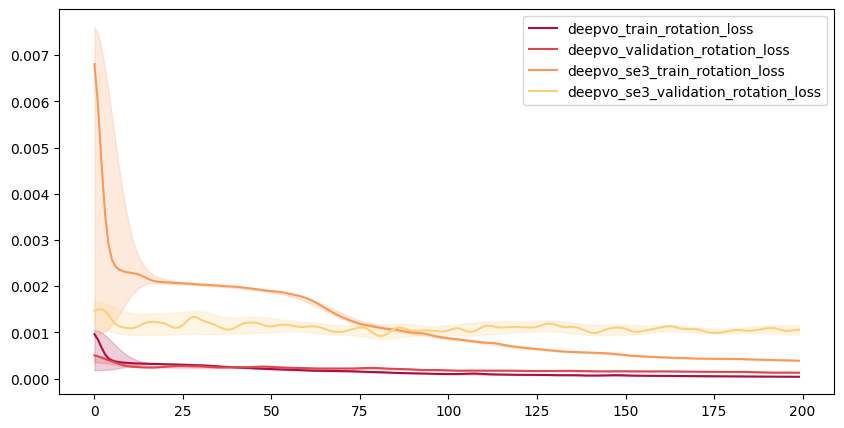

In [147]:
networks = ['deepvo','deepvo_se3','deepvo_quat', 'deepvo_quat_geodesic']
train_or_val = ['validation']
losses = ['translation_loss']
plot_loss(df_all, networks, train_or_val, losses, title="translation_validation", loss_label='Translation loss', ylim=[0,0.5])
losses = ['rotation_loss']
plot_loss(df_all, networks, train_or_val, losses, title="rotation_validation", loss_label='Rotation loss', ylim=[0,0.007])
train_or_val = ['train']
losses = ['translation_loss']
plot_loss(df_all, networks, train_or_val, losses, title="translation_train", loss_label='Translation loss', ylim=[0,0.5])
losses = ['rotation_loss']
plot_loss(df_all, networks, train_or_val, losses, title="rotation_train", loss_label='Rotation loss', ylim=[0,0.007])